<a href="https://colab.research.google.com/github/arincons2/ExploratoryDataAnalysis/blob/main/FDS_PROJECT_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_foodhub="/content/drive/MyDrive/foodhub_order.csv"
df = pd.read_csv(path_foodhub)

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape


(1898, 9)

#### Observations:
The data contains 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:
We can see that:
- order_id is an integer
- customer_id is an integer
- restaurant_name is a name
- cuisine_type is a name
- cost_of_the_order is a real (float)
- day_of_the_week	is a name (object)
- rating is considered as an object (but this is wrong)
- food_preparation_time is an integer
- delivery_time is an integer

The column 'rating' is considered as object, what is not correct,
as it should be considered as integer or float.
This problem is due to the fact that there are several 'Not given' values in the cells.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isna().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
We can see that:
- the results of the ''shape'' command indicate that the number of rows is 1898, whereas the results of the ''info'' command indicate that all the columns have 1898 values. This means that there are no missing values.
- the results of the 'isna' command indicate that there are no missing values.
- none of the variables have missing values.
- however, from the results above (using df.head and df.tail), one can see that the 'rating' column includes several 'Not given' values. This will be a problem when performing the statistical analysis.   



### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
- restaurant name has 178 unique categories. This means that there are 178 differrent restaurants
- cuisine type has 14 unique categories. This means that there are 14 different cuisine types.
- rating has 4 unique categories.
- day of the week has 2 unique categories. This is because it is either week or weekend.  
- minimum, average, and maximum time it takes for food to be prepared once an order is placed: minimum: 20.0; average: 27.4; median: 27.0; maximum: 35.0.

### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
df.loc[df['rating']=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


#### Observations:
The above results indicate that there are 736 unrated orders; that is, there are 736 order whose 'rating' is 'Not given'.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
# Command to tell Python to actually display the graphs
%matplotlib inline

We have a problem: the 'ratings' colum contains 'Not given' values. There are 736 rows where the rating is 'Not given'.
Therefore, we are going to construct a new DataFrame (named Newdf) that does not contain 'Not given' values, and we verify the features of this new DataFrame.

In [ ]:
Copydf = df.copy() #Esto crea una copia
Newdf=Copydf.loc[Copydf['rating'] != 'Not given'] #Newdf is the new dataframe
Newdf.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30


Now we verify the data type of 'ratings' column:

In [ ]:
Newdf.info() #now we verify the data type of 'ratings' column

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 90.8+ KB


As 'ratings' is considered as object, we must convert it to float or integer, and then we verify the features of the created DataFrame:

In [ ]:
#As 'ratings' is considered as object, we must convert it to float or integer
Newdf['rating'] = Newdf['rating'].astype(str).astype(float)
Newdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 90.8+ KB


<ipython-input-15-b325c40315d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newdf['rating'] = Newdf['rating'].astype(str).astype(float)


Now, we verify the counts of the categories of 'rating':

In [ ]:
#Now, we verify the counts of the categories of 'rating'
Newdf['rating'].value_counts()

,count
rating,
5.0,588
4.0,386
3.0,188


# **Now, we perform the univariate analysis**

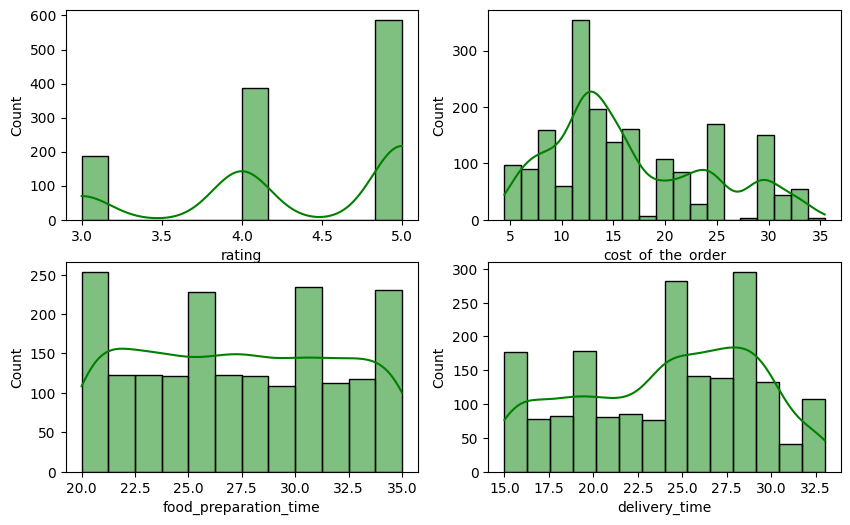

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(10,6))#(16,8)
sns.histplot(ax=axes[0, 0], data=Newdf, x='rating',color='green',kde = True);
sns.histplot(ax=axes[0, 1], data=df, x='cost_of_the_order',color='green',kde = True);
sns.histplot(ax=axes[1, 0], data=df, x='food_preparation_time',color='green',kde = True);
sns.histplot(ax=axes[1, 1], data=df, x='delivery_time',color='green',kde = True);
#sns.histplot(data=df, x='delivery_time',kde = True)

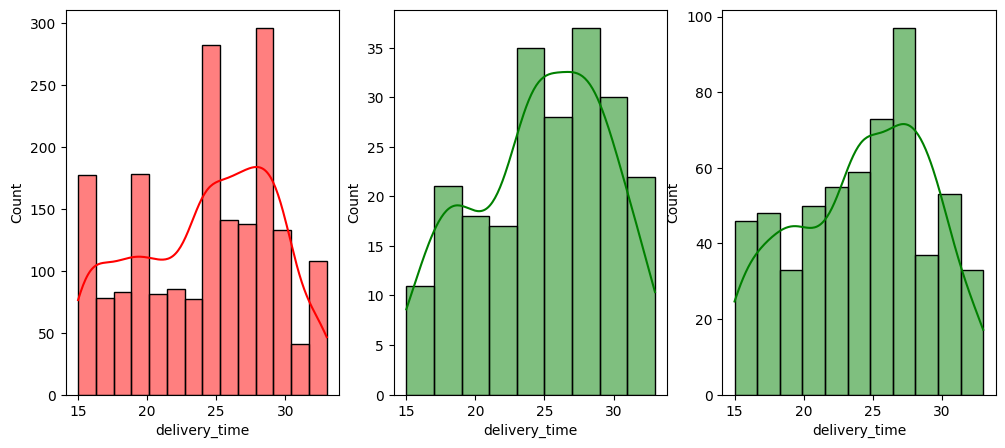

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(12,5))#(16,8)
sns.histplot(ax=axes[0], data=df, x='delivery_time',color='red',kde = True);
sns.histplot(ax=axes[1], data=df[df.restaurant_name =='Shake Shack'], x='delivery_time',color='green',kde = True);
sns.histplot(ax=axes[2], data=df[df.cuisine_type == 'American'], x='delivery_time',color='green',kde = True);

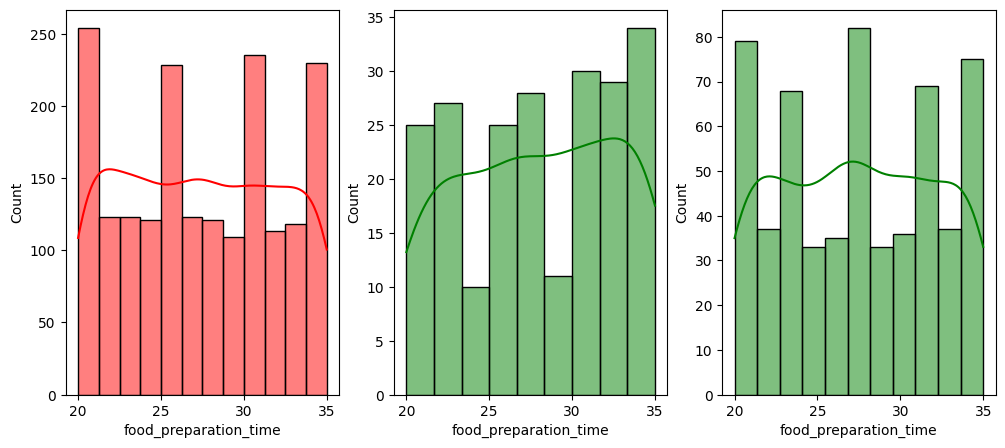

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(12,5))#(16,8)
sns.histplot(ax=axes[0], data=df, x='food_preparation_time',color='red',kde = True);
sns.histplot(ax=axes[1], data=df[df.restaurant_name =='Shake Shack'], x='food_preparation_time',color='green',kde = True);
sns.histplot(ax=axes[2], data=df[df.cuisine_type == 'American'], x='food_preparation_time',color='green',kde = True);

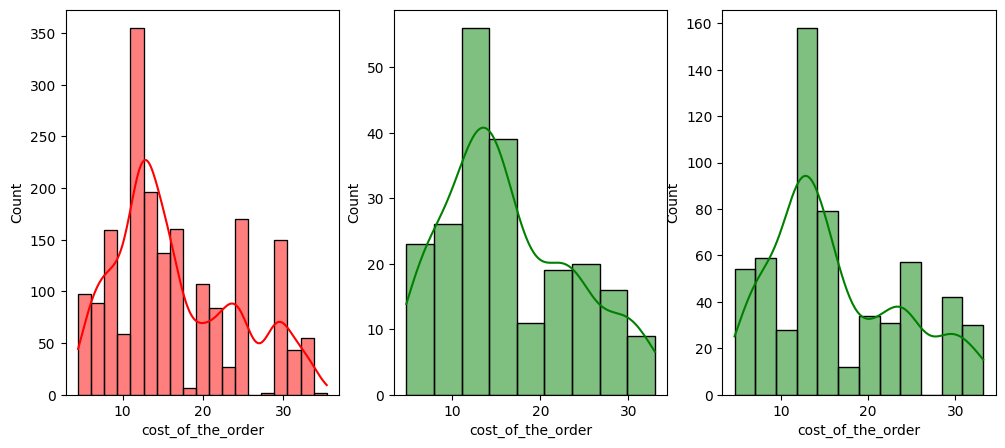

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=False, figsize=(12,5))#(16,8)
sns.histplot(ax=axes[0], data=df, x='cost_of_the_order',color='red',kde = True);
sns.histplot(ax=axes[1], data=df[df.restaurant_name =='Shake Shack'], x='cost_of_the_order',color='green',kde = True);
sns.histplot(ax=axes[2], data=df[df.cuisine_type == 'American'], x='cost_of_the_order',color='green',kde = True);

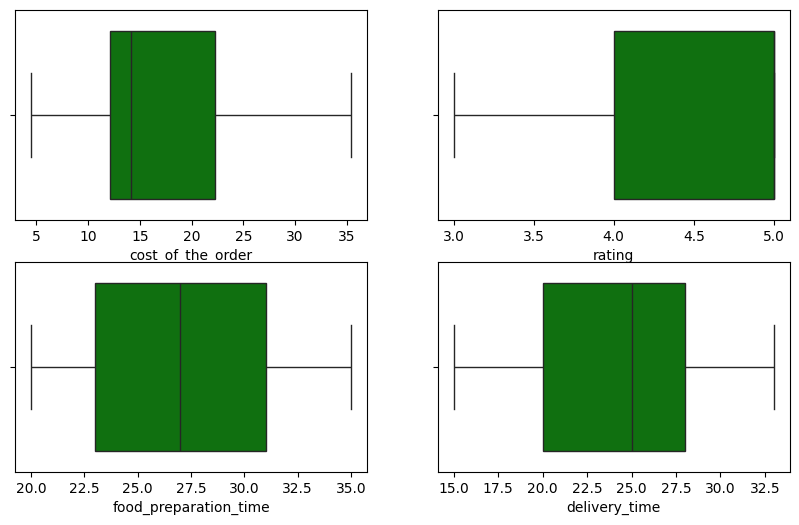

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=False, figsize=(10,6))#(16,8)
sns.boxplot(ax=axes[0, 0], data=df, x='cost_of_the_order',color='green');

sns.boxplot(ax=axes[0, 1], data=Newdf, x='rating',color='green');

sns.boxplot(ax=axes[1, 0], data=df, x='food_preparation_time',color='green');

sns.boxplot(ax=axes[1, 1], data=df, x='delivery_time',color='green');

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

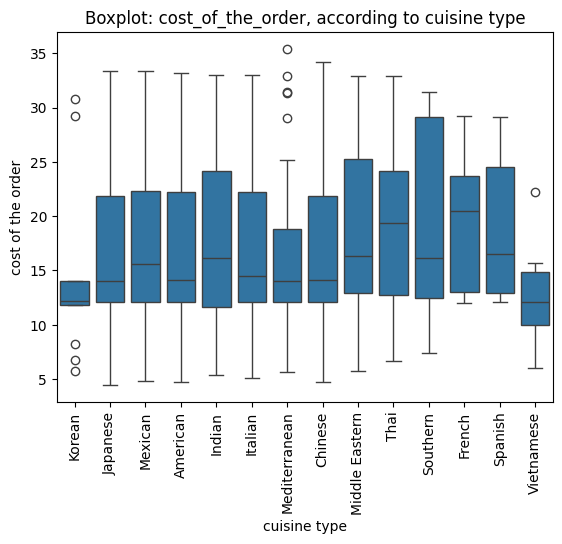

In [ ]:
plt.title('Boxplot: cost_of_the_order, according to cuisine type')
#plt.xlim(30,300)
plt.xlabel('cuisine type')
plt.ylabel('cost of the order')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order') ;
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

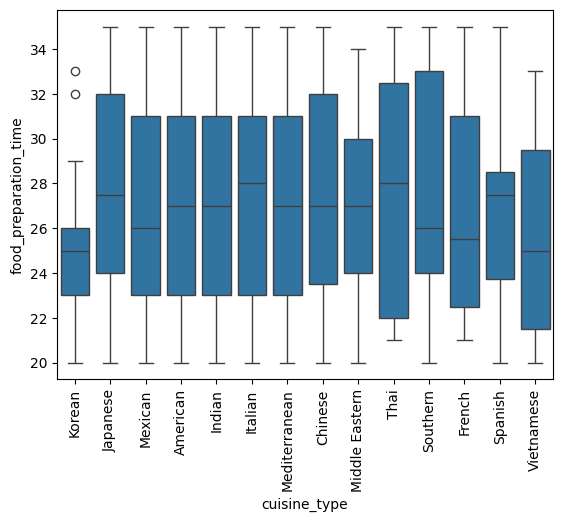

In [ ]:
#plt.xlim(30,300)
#plt.xlabel('day_of_the_week')
#plt.ylabel('food_preparation_time')
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time');
plt.xticks(rotation=90)

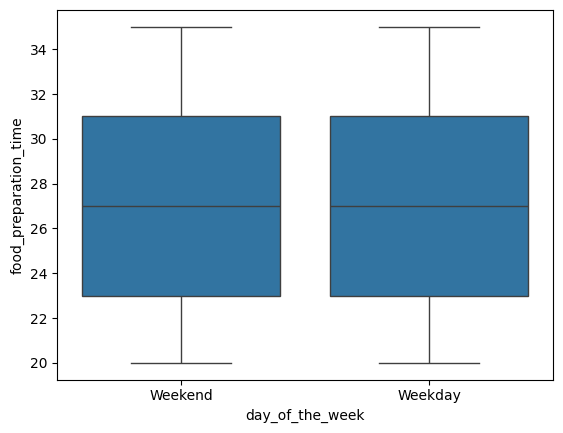

In [ ]:
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time') ;


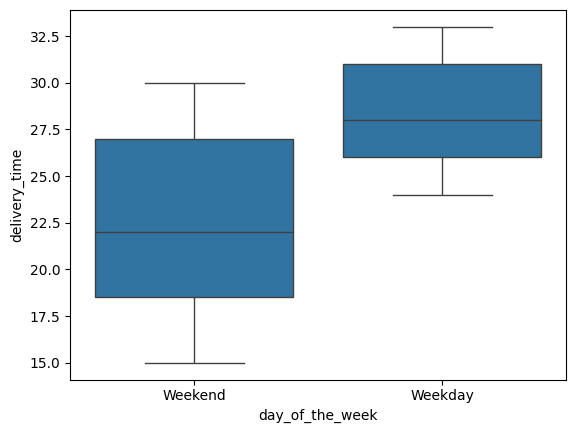

In [ ]:
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time') ;

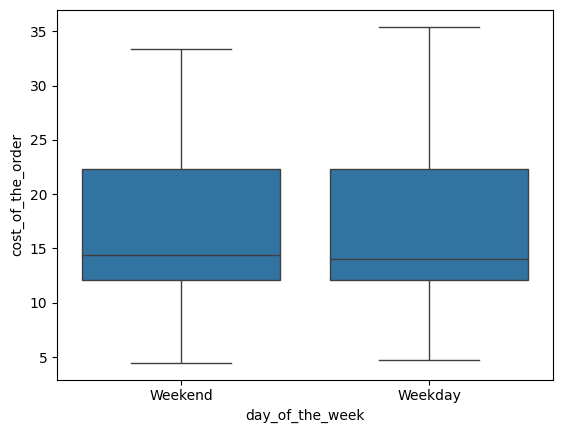

In [ ]:
sns.axes_style('whitegrid')
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order') ;

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Mexican'),
  Text(1, 0, 'American'),
  Text(2, 0, 'Indian'),
  Text(3, 0, 'Mediterranean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Japanese'),
  Text(6, 0, 'Middle Eastern'),
  Text(7, 0, 'Italian'),
  Text(8, 0, 'Thai'),
  Text(9, 0, 'Southern'),
  Text(10, 0, 'Spanish'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Korean'),
  Text(13, 0, 'Vietnamese')])

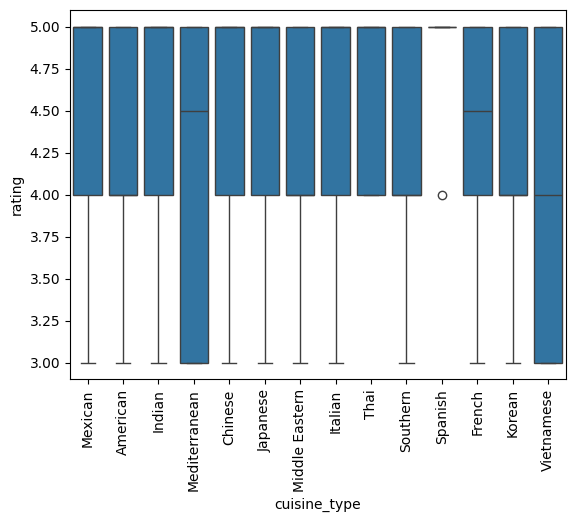

In [ ]:
sns.axes_style('whitegrid')
sns.boxplot(data=Newdf, x='cuisine_type', y='rating') ;
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'Weekday'), Text(1, 0, 'Weekend')])

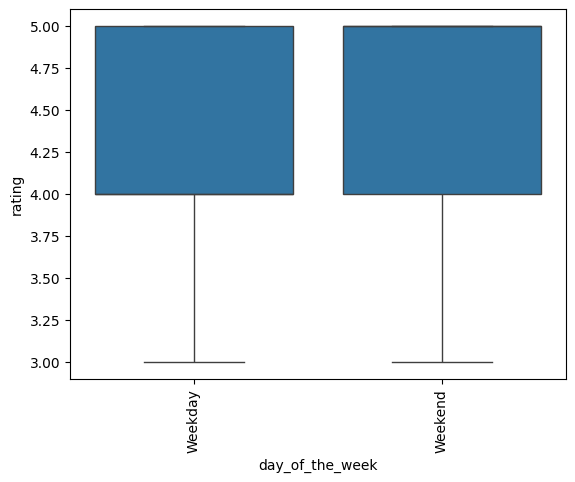

In [ ]:
sns.axes_style('whitegrid')
sns.boxplot(data=Newdf, x='day_of_the_week', y='rating') ;
plt.xticks(rotation=90)

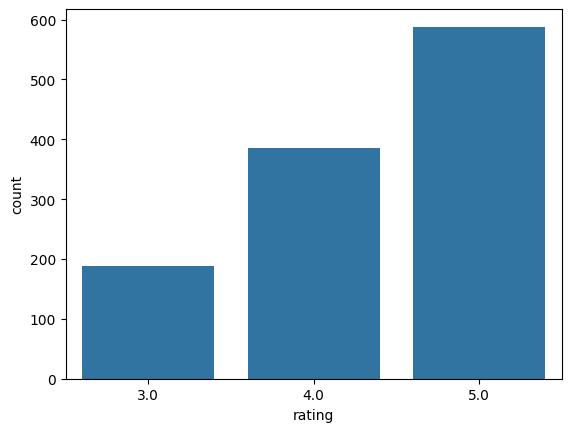

In [ ]:
sns.countplot(data=Newdf, x='rating') ;

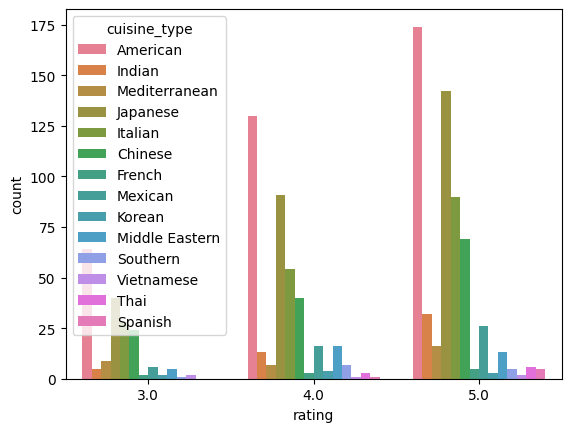

In [ ]:
sns.countplot(data=Newdf, x='rating', hue='cuisine_type',) ;
#plt.xticks(rotation=90)

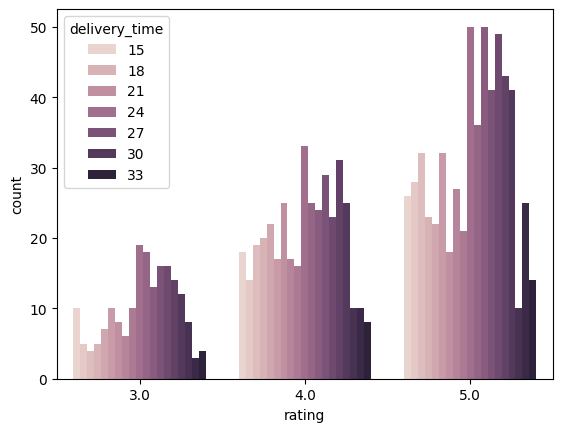

In [ ]:
sns.countplot(data=Newdf, x='rating', hue='delivery_time',) ;
#plt.xticks(rotation=90)

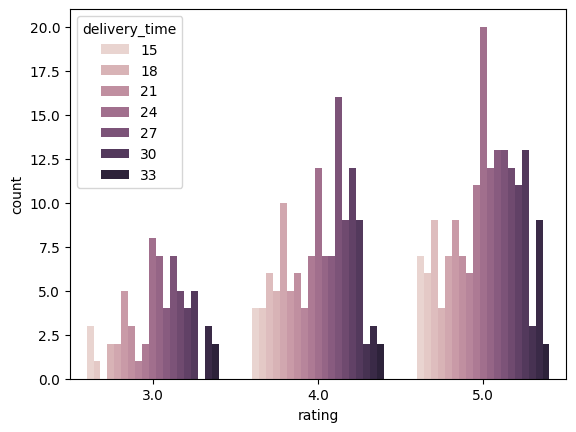

In [ ]:
sns.countplot(data=Newdf.loc[Newdf['cuisine_type'] == 'American'], x='rating', hue='delivery_time',) ;
#plt.xticks(rotation=90)

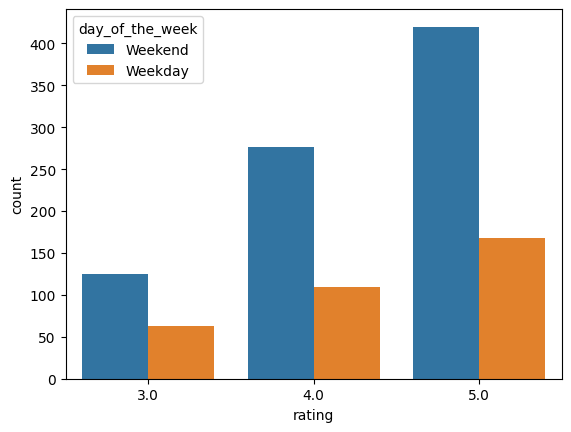

In [ ]:
sns.countplot(data=Newdf, x='rating', hue='day_of_the_week',) ;
#plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

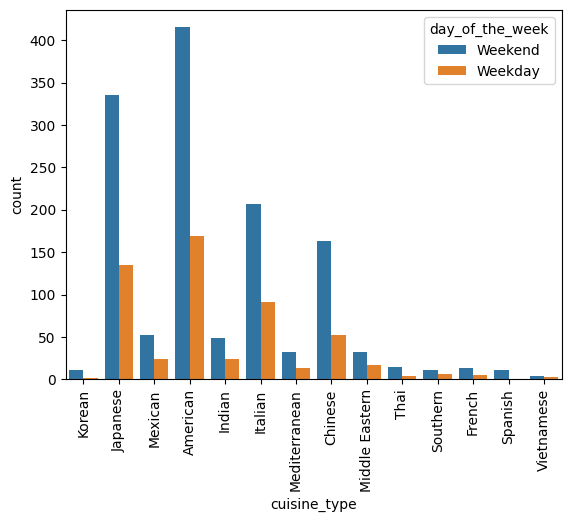

In [ ]:
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week',) ;
plt.xticks(rotation=90)

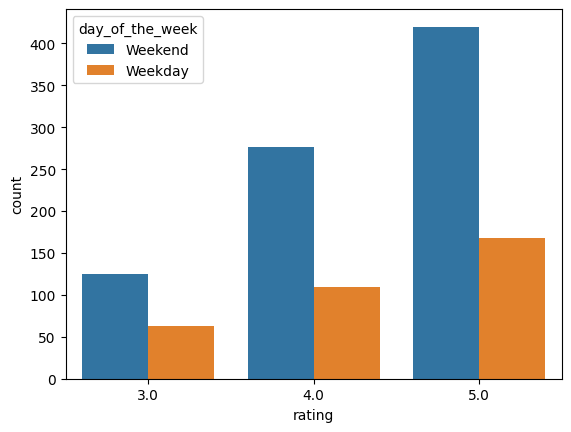

In [ ]:
sns.countplot(data=Newdf, x='rating', hue='day_of_the_week',) ;
#plt.xticks(rotation=90)

We draw the following conclusions from the above univariate analysis:
- The 'rating' is left skewed. The 'cost of the order' is right skewed. The 'delivery time' and 'food preparation time' seem to have no defined skewness. However, from the boxplot it seems that the delivery time is left skewed.  
- The 'delivery time' histogram improves and gets left skewed when it is defined for a single restaurant, for instance 'Shake Shack'
- The histogram of food prepapration time does not improve when a single restaurant is used.  
- The histogram of 'cost of the order' improves a little when it is defined for a single restaurant, for instance 'Shake Shack'
- From the discriminated boxplots it follows that:
   - 'cost of the order' highly depends on the cuisine type
   - 'food preparation time' highly depends on the cuisine  type.  
   - 'delivery time' is highly dependent on the 'day of the week'
   - it seems that'cost of the order' and 'food preparation type' do not depend on 'day of the week'
- From the count plots it follows that:
   - the count of rating is highly dependent on the 'cuisine type'
   - the count of rating depends on the delivery time
   - the count of rating highly depends on the day of the week
   - the count of cuisine type depends on day of the week

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Write the code here
df['restaurant_name'].value_counts()
#sorted_data = df.sort_values(by='cost', ascending=True)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
According to the above result, the top 5 restaurants in terms of the number of orders received are:  

Shake Shack,       
The Meatball Shop            
Blue Ribbon Sushi            
Blue Ribbon Fried Chicken     
Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Write the code here
Newdf_weekends=df.loc[df['day_of_the_week'] =='Weekend'];# A new DataFrame (Newdf_weekends) is created, in which only 'Weekend' values for 'day_of_the_week'
Newdf_weekends['cuisine_type'].value_counts()
#my_value_count = df['cuisine_type'].value_counts()
#my_value_count.loc[df['day_of_the_week'] == 'Weekend']

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

#### Observations:
From the above result it follows that the most popular cuisine type on weekends is American.  


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Write the code her e
Newdf2=df.loc[df['cost_of_the_order'] > 20] # A new DataFrame is created, 'Newdf2', which satisfies cost_of_the_order > 20
print('Now the first rows are: \n')
Newdf2.head()

Now the first rows are: 



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22


In [ ]:
print('Now the last rows are: \n')
Newdf2.tail()


Now the last rows are: 



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


In [ ]:
Newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 1895
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               555 non-null    int64  
 1   customer_id            555 non-null    int64  
 2   restaurant_name        555 non-null    object 
 3   cuisine_type           555 non-null    object 
 4   cost_of_the_order      555 non-null    float64
 5   day_of_the_week        555 non-null    object 
 6   rating                 555 non-null    object 
 7   food_preparation_time  555 non-null    int64  
 8   delivery_time          555 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 43.4+ KB


According to the above result, the number of orders with cost higher than 20 dollars is: 555. This value is given by the above result, using 'info' command.

Total  number of orders of the original DataFrame: 1898. This value is obtained from the initial analysis of the DataFrame, using 'info' command.

Using these two values, we have:


Percentage: = 100*555/1898 =29.24


In [ ]:
Percentage = 100 * 555 / 1898
print(Percentage)

29.24130663856691


#### Observations:
Then, as final conclusion, the percentage of the orders that cost more than 20 dollars is 29.24 %


### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
According to the above result, the mean order delivery time es 24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Write the code here
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observations: From the above result, it follow that the top 3 most frequent customers  and the number of orders are:
Customer ID:       Number of orders
- 52832:           13
- 47440:           10
- 83287:           9



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

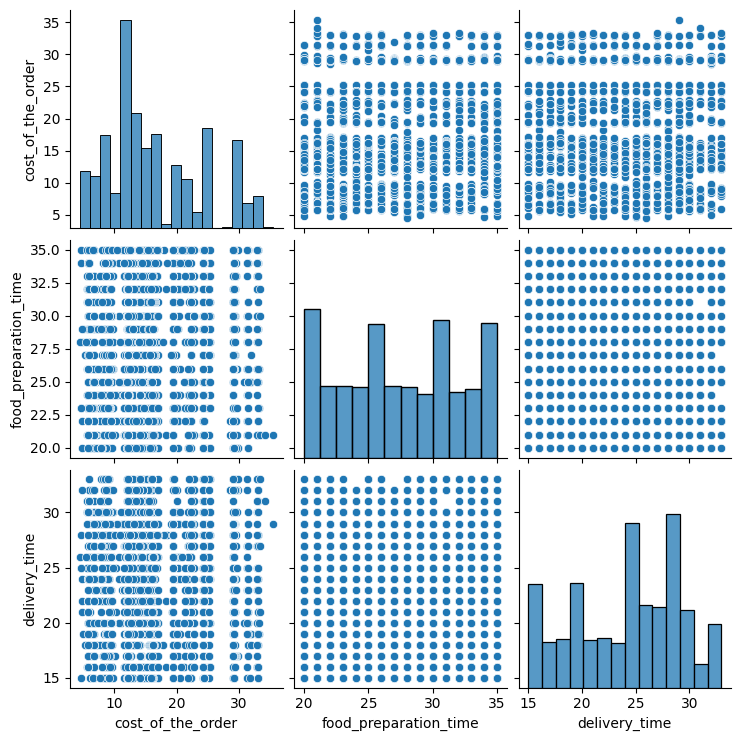

In [ ]:
# Write the code here

sns.pairplot(data=df[['cost_of_the_order','food_preparation_time','delivery_time']])

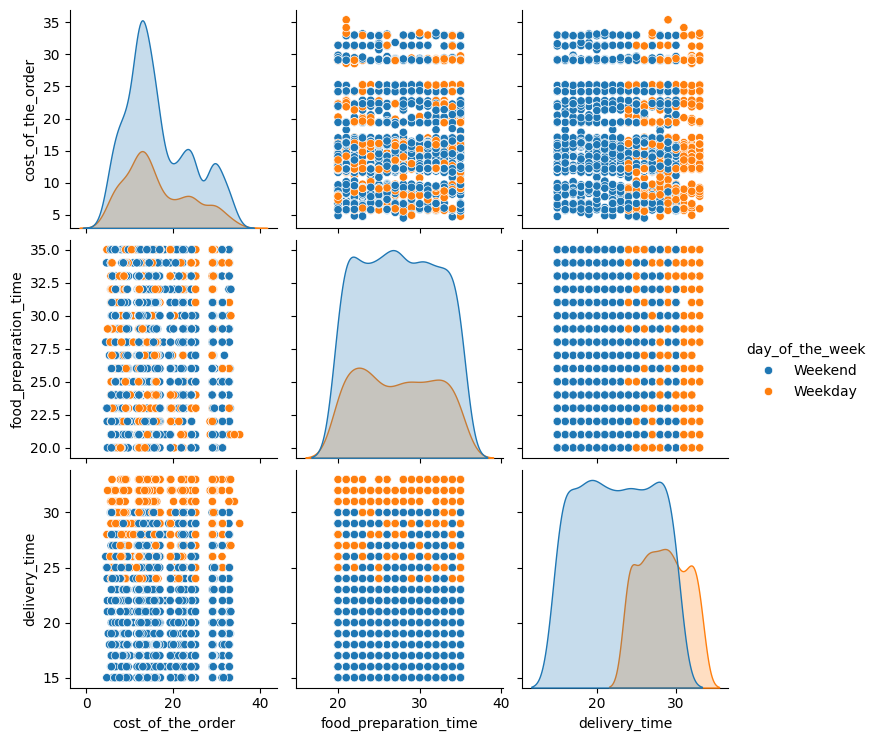

In [ ]:
sns.pairplot(data=df, vars=['cost_of_the_order','food_preparation_time','delivery_time'], hue='day_of_the_week');

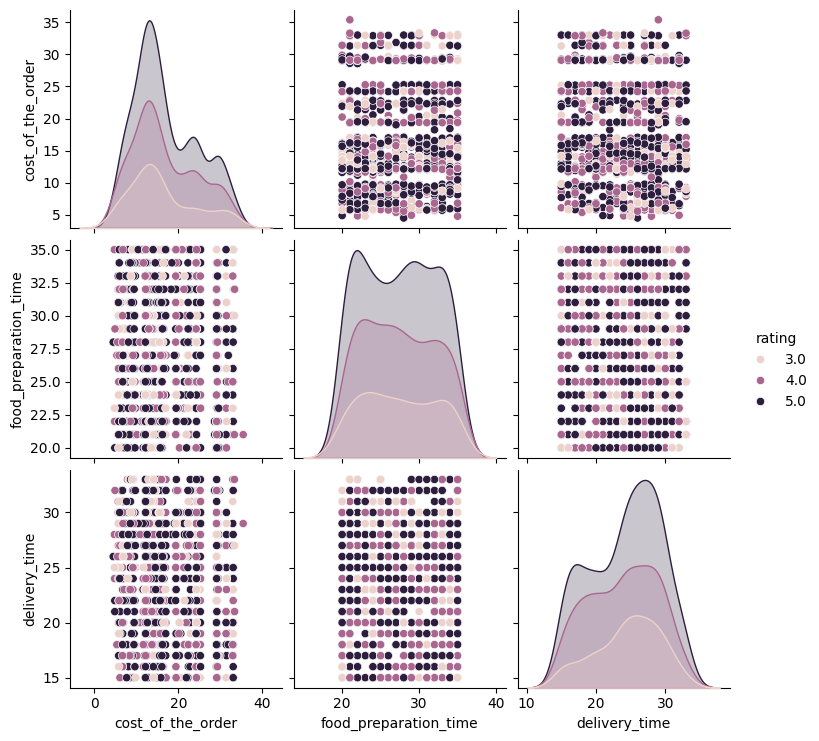

In [ ]:
sns.pairplot(data=Newdf, vars=['cost_of_the_order','food_preparation_time','delivery_time'], hue='rating');

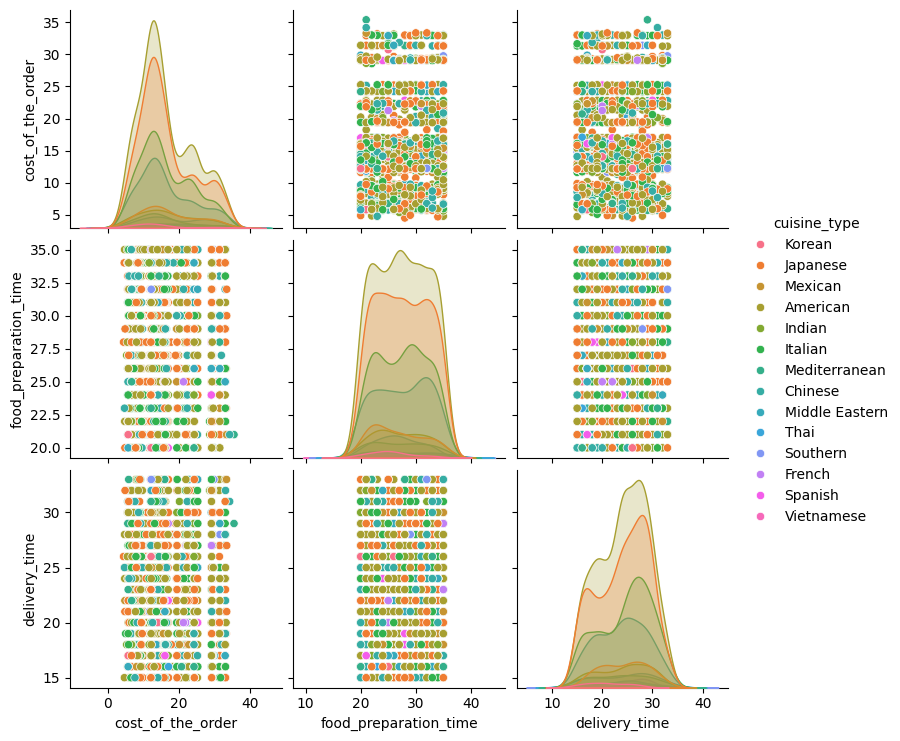

In [ ]:
sns.pairplot(data=df, vars=['cost_of_the_order','food_preparation_time','delivery_time'], hue='cuisine_type');

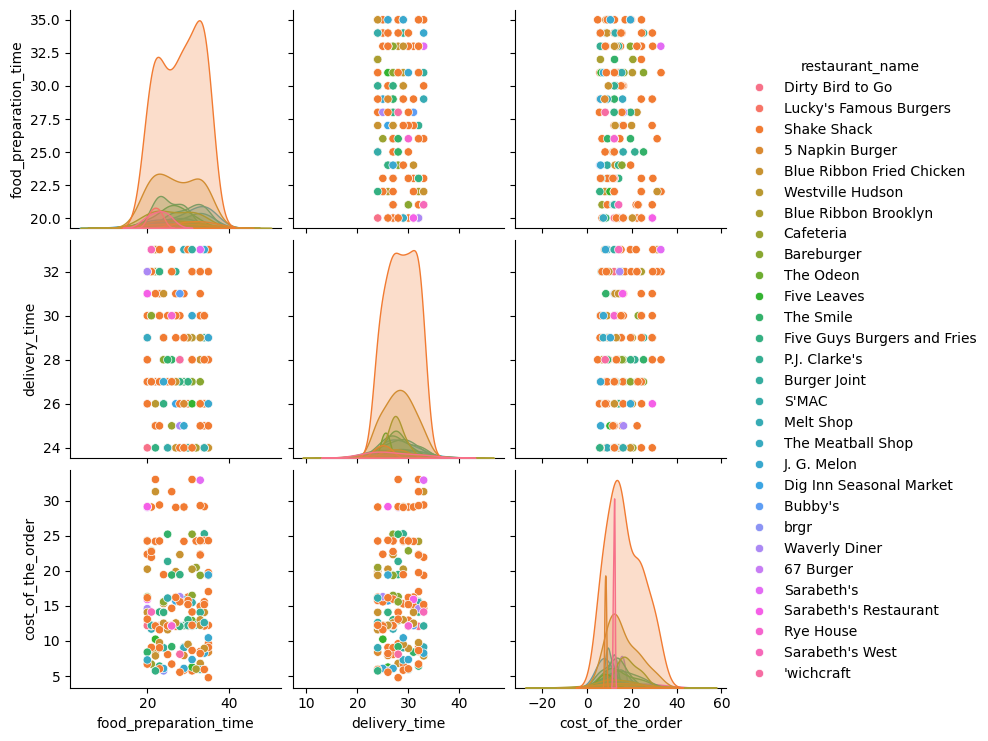

In [ ]:
sns.pairplot(data=df[(df.cuisine_type == 'American') & (df.day_of_the_week == 'Weekday')], vars=['food_preparation_time','delivery_time','cost_of_the_order'], hue = 'restaurant_name');

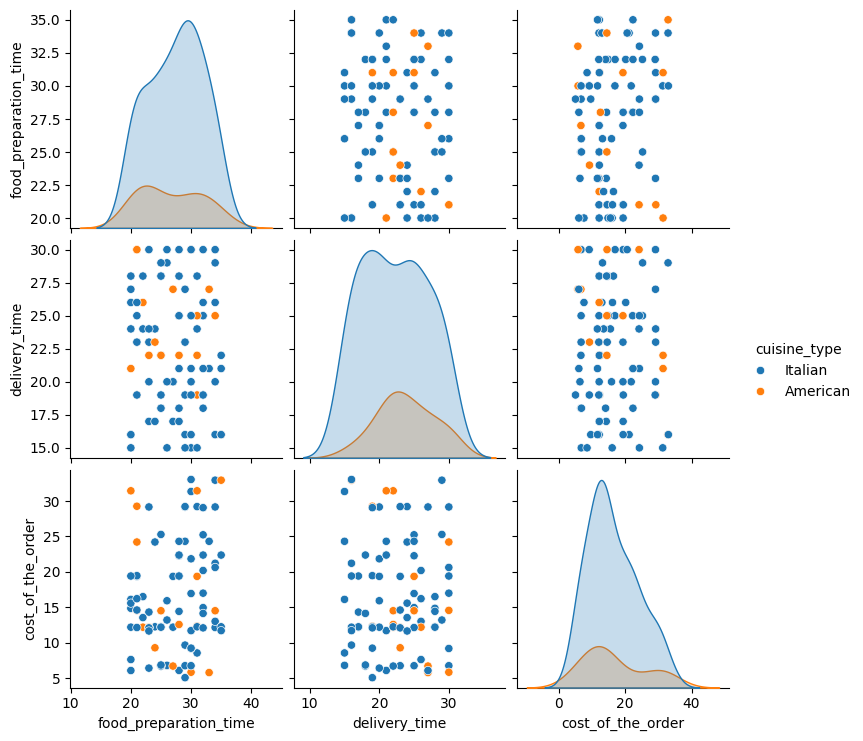

In [ ]:
sns.pairplot(data=df[(df.restaurant_name == 'The Meatball Shop') & (df.day_of_the_week == 'Weekend')], vars=['food_preparation_time','delivery_time', 'cost_of_the_order'], hue = 'cuisine_type');

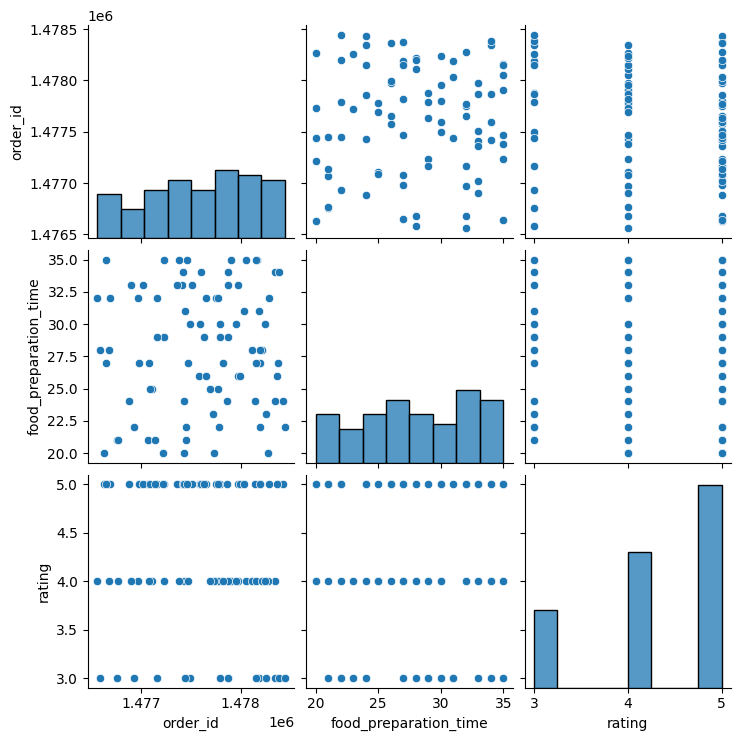

In [ ]:
sns.pairplot(data=Newdf[(Newdf.restaurant_name == 'Shake Shack') & (Newdf.day_of_the_week == 'Weekend')], vars=['order_id','food_preparation_time','rating']);

<ipython-input-49-f66f8fe60ace>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.pairplot(data=Newdf[(Newdf.restaurant_name == 'Shake Shack') & (Newdf.day_of_the_week == 'Weekend') & (df.cuisine_type == 'American')], vars=['cost_of_the_order','food_preparation_time'], hue = 'rating');


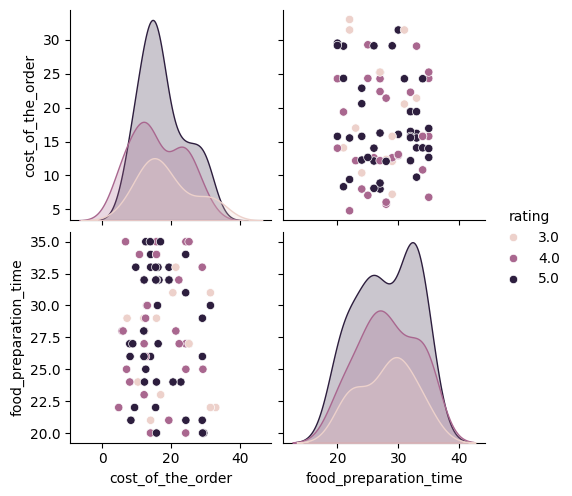

In [ ]:
sns.pairplot(data=Newdf[(Newdf.restaurant_name == 'Shake Shack') & (Newdf.day_of_the_week == 'Weekend') & (df.cuisine_type == 'American')], vars=['cost_of_the_order','food_preparation_time'], hue = 'rating');

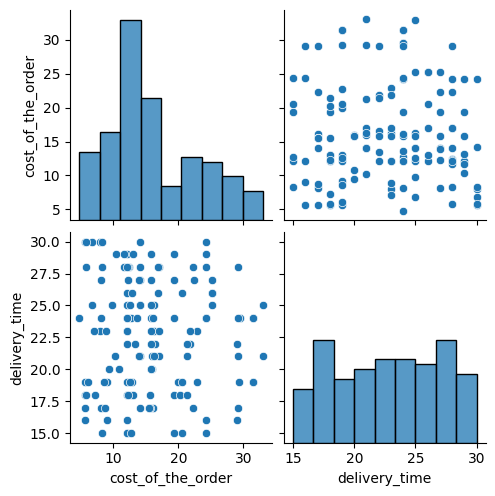

In [ ]:
sns.pairplot(data=df[(df.restaurant_name == 'Shake Shack') & (df.day_of_the_week == 'Weekend') & (df.cuisine_type == 'American')], vars=['cost_of_the_order','delivery_time']);

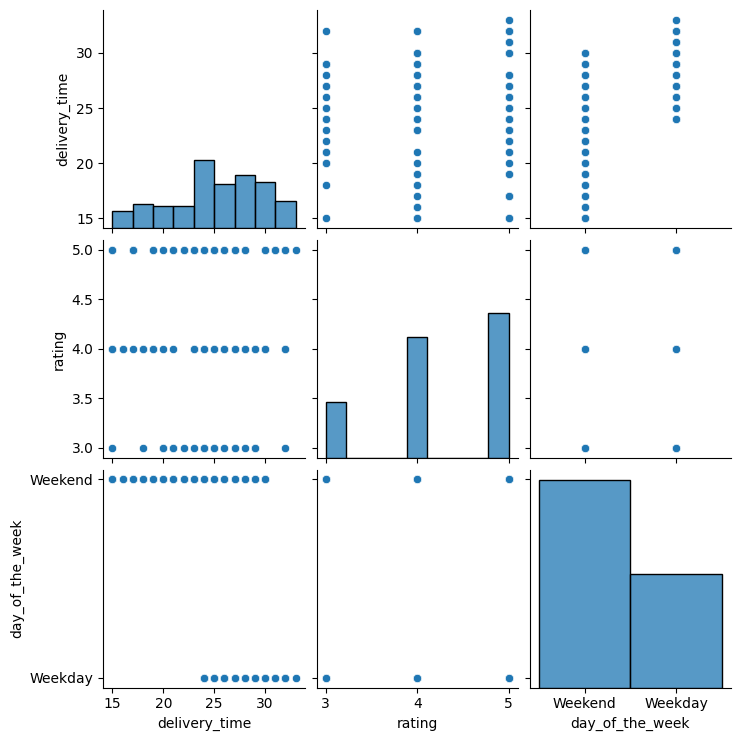

In [ ]:
sns.pairplot(data=Newdf[(Newdf.restaurant_name == 'Shake Shack') & (Newdf.cuisine_type == 'American')], vars=['delivery_time','rating','day_of_the_week']);

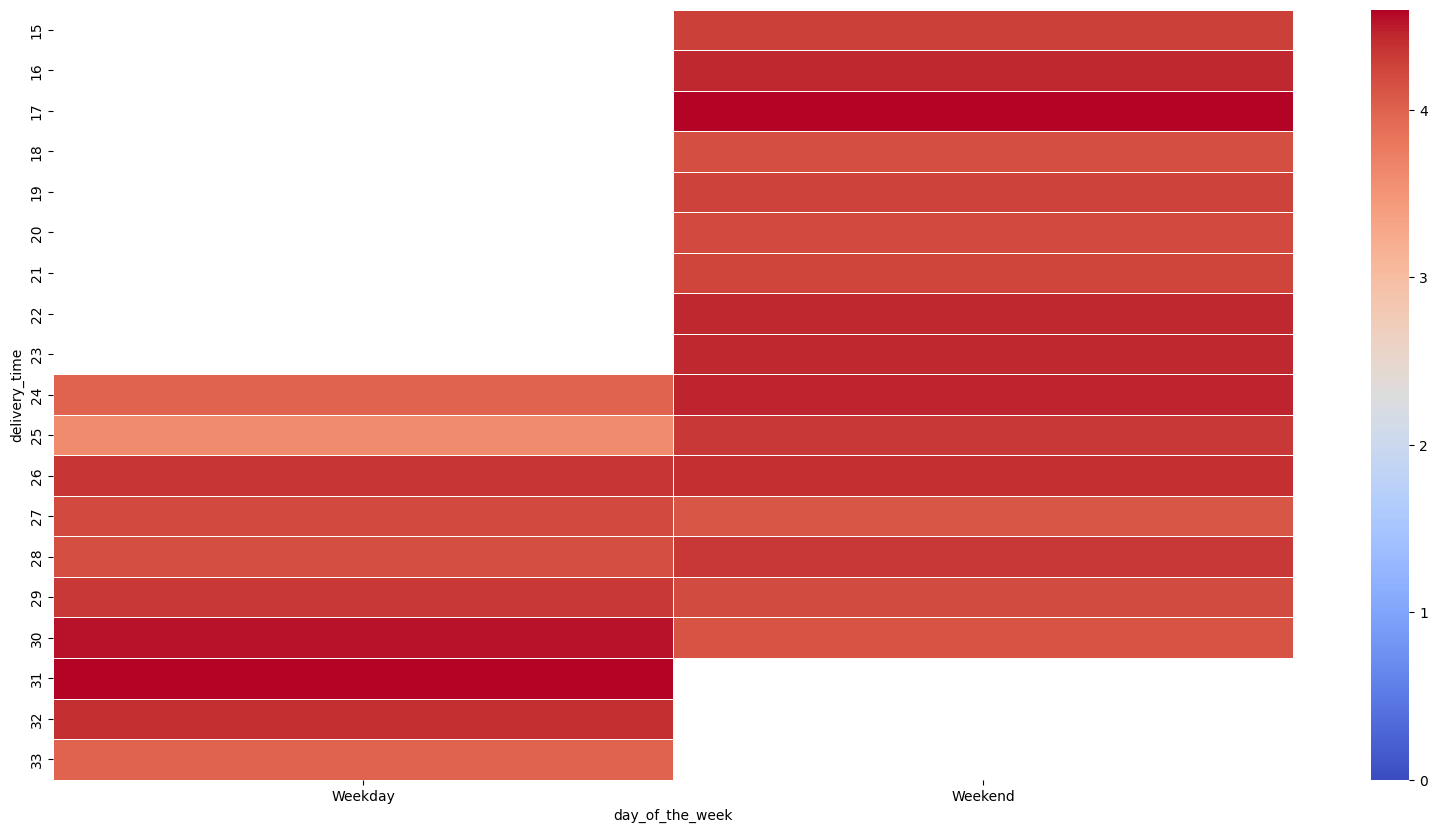

In [ ]:
df_man = Newdf[Newdf.cuisine_type == 'American']
df_hm = df_man.pivot_table(index = 'delivery_time', columns = 'day_of_the_week', values = 'rating')

# Draw a heatmap
plt.figure(figsize = (20, 10)) # To resize the plot
sns.heatmap(df_hm,  fmt = "d", cmap = 'coolwarm', linewidths = .5, vmin = 0)
plt.show()

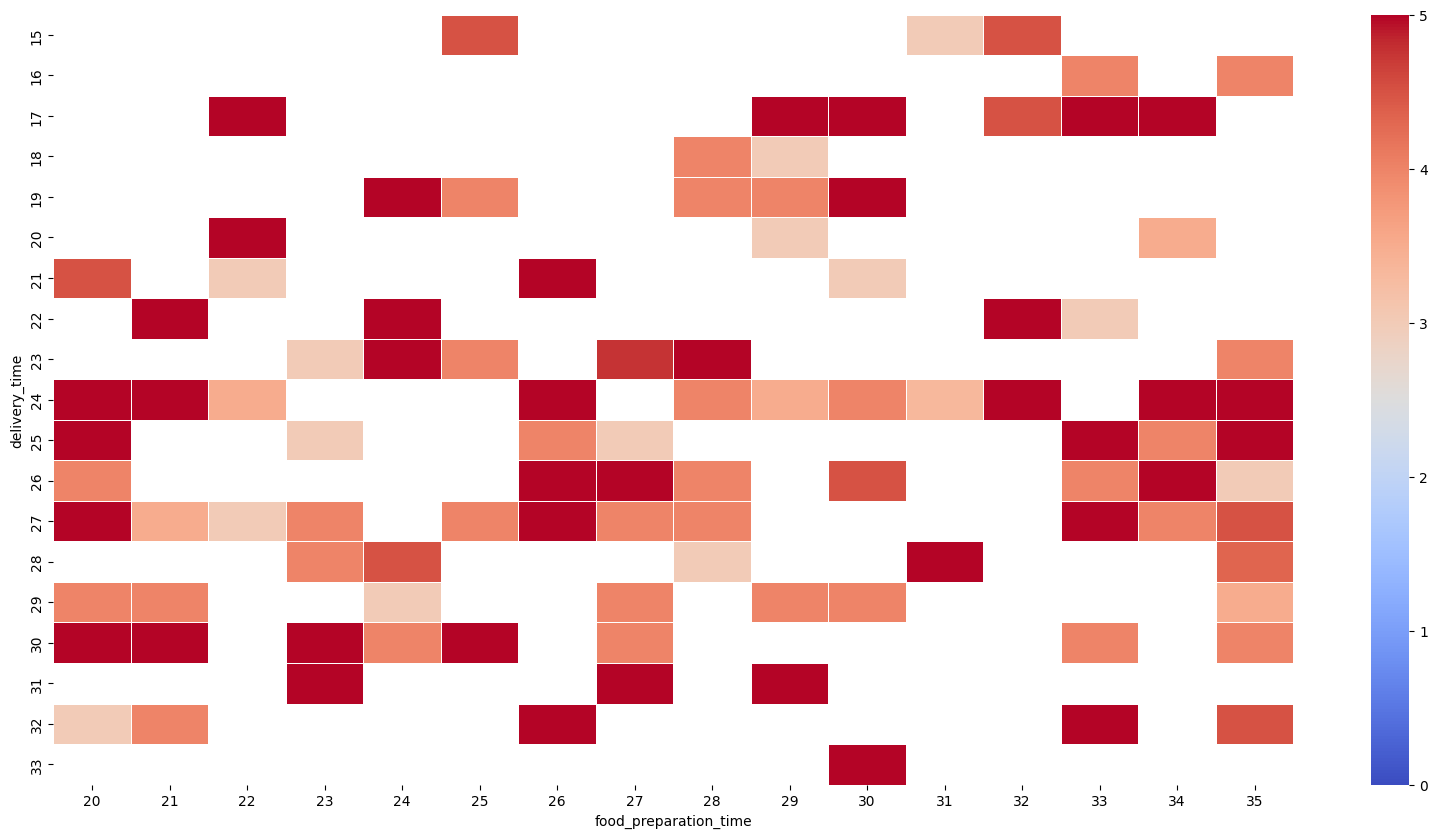

In [ ]:
df_man = Newdf[(Newdf.cuisine_type == 'American') & (Newdf.restaurant_name == 'Shake Shack')]
df_hm = df_man.pivot_table(index = 'delivery_time', columns = 'food_preparation_time', values = 'rating')

# Draw a heatmap
plt.figure(figsize = (20, 10)) # To resize the plot
sns.heatmap(df_hm,  fmt = "d", cmap = 'coolwarm', linewidths = .5, vmin = 0)
plt.show()

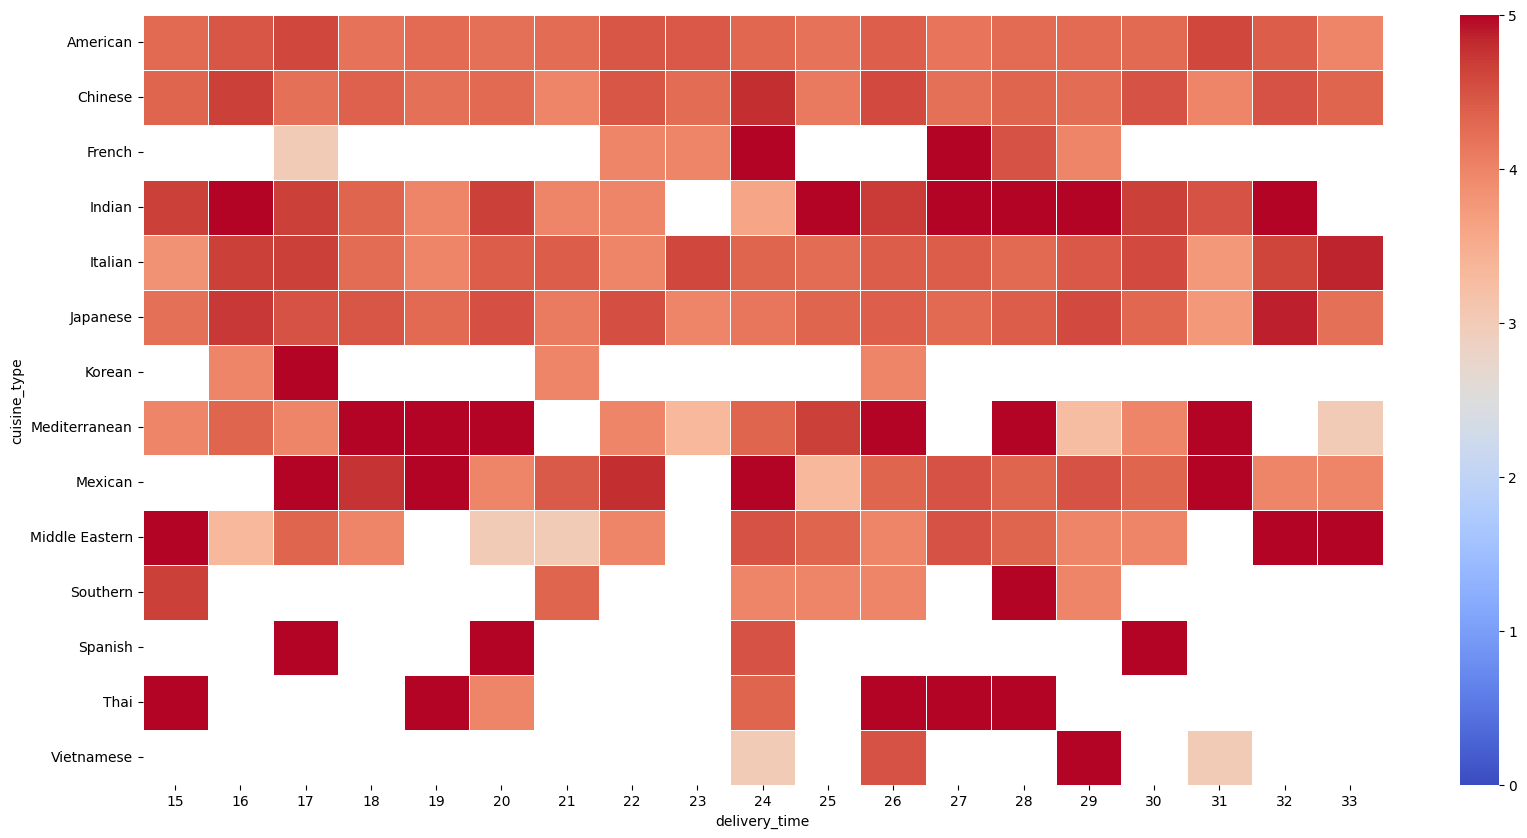

In [ ]:
df_man = Newdf#[(Newdf.restaurant_name == 'Shake Shack')]

df_hm = df_man.pivot_table(index = 'cuisine_type', columns = 'delivery_time', values = 'rating')

# Draw a heatmap
plt.figure(figsize = (20, 10)) # To resize the plot
sns.heatmap(df_hm,  fmt = "d", cmap = 'coolwarm', linewidths = .5, vmin = 0)
plt.show()


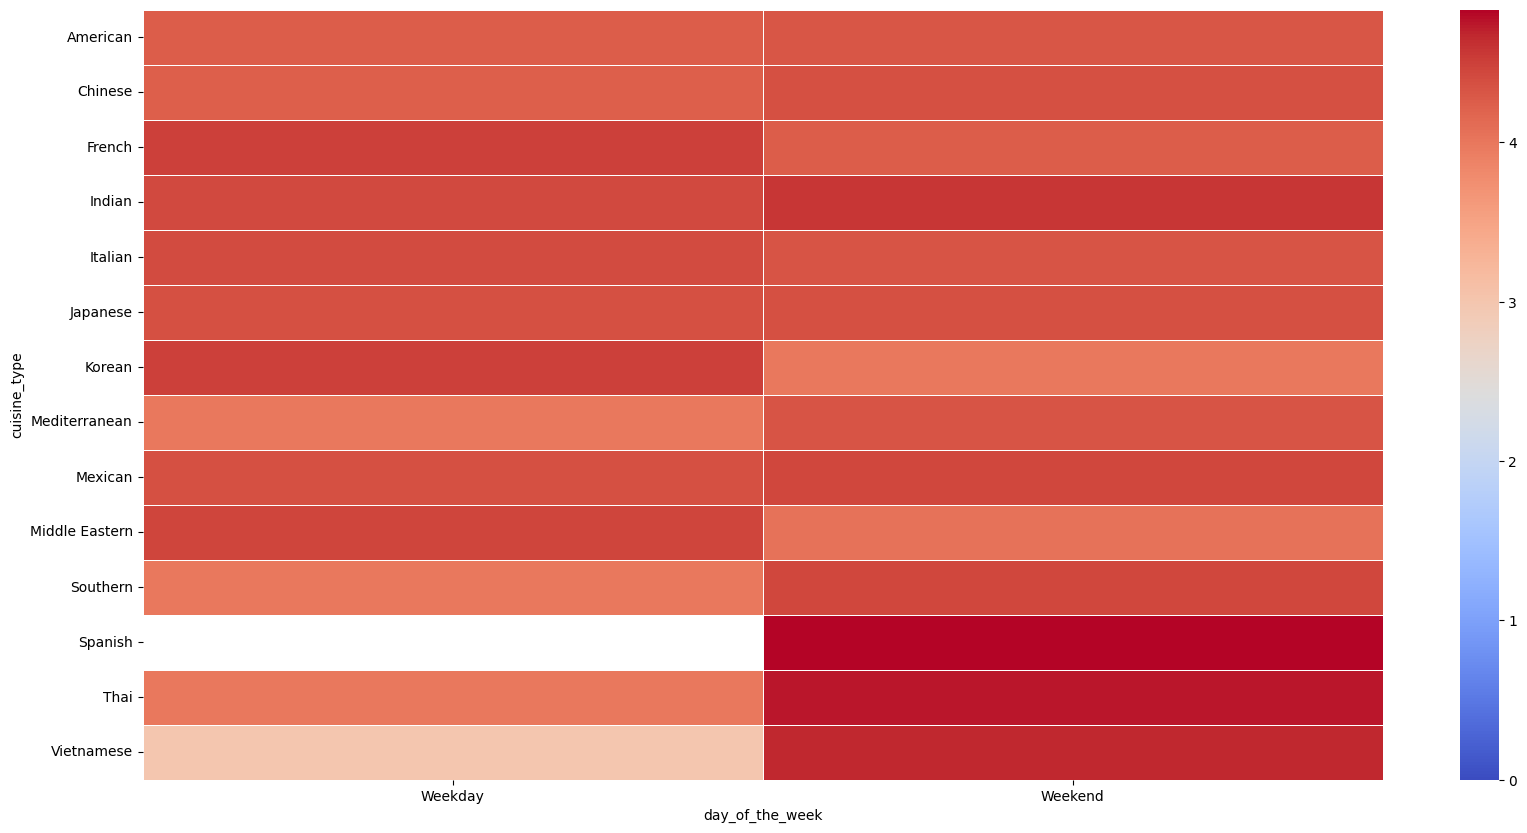

In [ ]:
df_man = Newdf
df_hm = df_man.pivot_table(index = 'cuisine_type', columns = 'day_of_the_week', values = 'rating')

# Draw a heatmap
plt.figure(figsize = (20, 10)) # To resize the plot
sns.heatmap(df_hm,  fmt = "d", cmap = 'coolwarm', linewidths = .5, vmin = 0)
plt.show()

In [ ]:
#empty

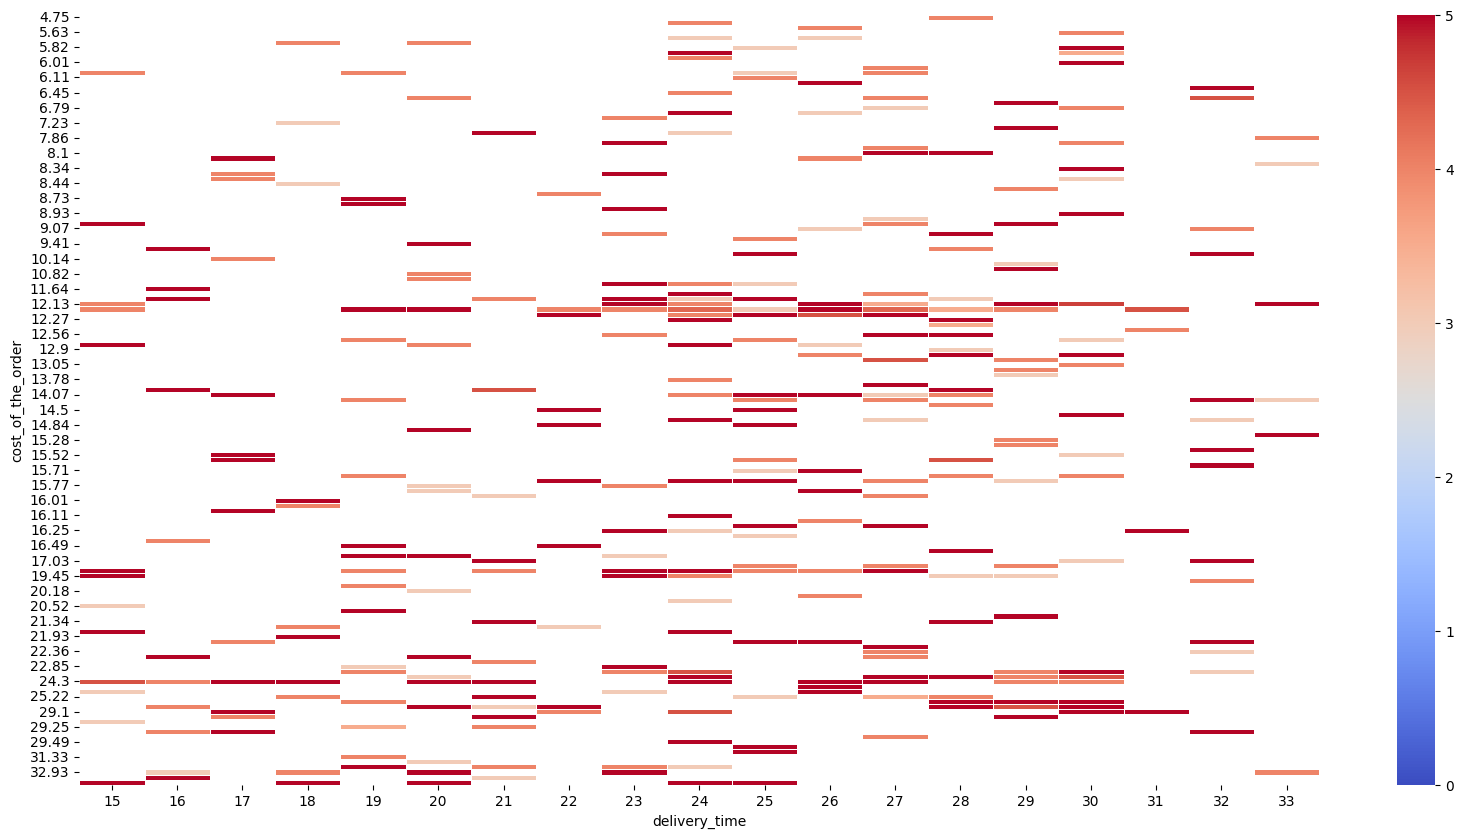

In [ ]:
df_man = Newdf[Newdf.cuisine_type == 'American']
df_hm = df_man.pivot_table(index = 'cost_of_the_order', columns = 'delivery_time', values = 'rating')

# Draw a heatmap
plt.figure(figsize = (20, 10)) # To resize the plot
sns.heatmap(df_hm,  fmt = "d", cmap = 'coolwarm', linewidths = .5, vmin = 0)
plt.show()

In [ ]:
CopyNewdf = Newdf.copy() #Esto crea una copia de Newdf
Newdf3=CopyNewdf.loc[(CopyNewdf['restaurant_name'] == 'Shake Shack')]

Newdf3['cuisine_type'].value_counts()

American    133
Name: cuisine_type, dtype: int64

## **We draw the following conclusions from the above multivariate analysis:**
- we didn't find a relationship between 'cost of the order', 'food preparation time', 'delivery time',
 even when we discriminated according to 'day of the week' or 'rating' or 'cuisine type',
 and even when we used a single 'cuisine type', or a fixed 'restaurant name'.
- From the heat map it seems that the rating depends on delivery time and weekday

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here
Newdf['rating'].value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

The DataFrame 'Newdf' has eliminated the rows containing 'Not given' values in the 'rating'. Therefore, to find the restaurants that have a rating count of more than 50 is the same that to find the restaurants of Newdf DataFrame that have a count of more than 50   

In [ ]:
Newdf['restaurant_name'].value_counts()

Shake Shack                    133
The Meatball Shop               84
Blue Ribbon Sushi               73
Blue Ribbon Fried Chicken       64
RedFarm Broadway                41
                              ... 
Philippe Chow                    1
Dirty Bird To Go (archived)      1
The MasalaWala                   1
Kambi Ramen House                1
'wichcraft                       1
Name: restaurant_name, Length: 156, dtype: int64

From the above result, we see that the first four restaurants (Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken), have a count higher than 50. Therefore, these restaurants have a rating count higher than 50.

Now, we are going to find out which of those restaurants (from Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken) have an average rating greater than 4.

First, we create a new DataFrame such that it only contains the four restaurants (Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken)

In [ ]:
CopyNewdf = Newdf.copy() #Esto crea una copia de Newdf
Newdf2=CopyNewdf.loc[(CopyNewdf['restaurant_name'] == 'Shake Shack') | (CopyNewdf['restaurant_name'] == 'The Meatball Shop') | (CopyNewdf['restaurant_name'] == 'Blue Ribbon Sushi') | (CopyNewdf['restaurant_name'] == 'Blue Ribbon Fried Chicken')]
#print(Newdf2)


In [ ]:
Newdf2.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.2,Weekend,3.0,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.3,Weekend,5.0,23,17
15,1477414,66222,Shake Shack,American,16.2,Weekend,5.0,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.2,Weekend,4.0,35,26
22,1478287,150599,Shake Shack,American,29.1,Weekday,5.0,21,30


In [ ]:
Newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 1895
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               555 non-null    int64  
 1   customer_id            555 non-null    int64  
 2   restaurant_name        555 non-null    object 
 3   cuisine_type           555 non-null    object 
 4   cost_of_the_order      555 non-null    float64
 5   day_of_the_week        555 non-null    object 
 6   rating                 555 non-null    object 
 7   food_preparation_time  555 non-null    int64  
 8   delivery_time          555 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 43.4+ KB


We can see that 'rating' column is considered as object. Therefore, we have to convert 'rating' column to float or integer

In [ ]:
Newdf2['rating'] = Newdf2['rating'].astype(str).astype(float)
Newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 3 to 1888
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               354 non-null    int64  
 1   customer_id            354 non-null    int64  
 2   restaurant_name        354 non-null    object 
 3   cuisine_type           354 non-null    object 
 4   cost_of_the_order      354 non-null    float64
 5   day_of_the_week        354 non-null    object 
 6   rating                 354 non-null    float64
 7   food_preparation_time  354 non-null    int64  
 8   delivery_time          354 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 27.7+ KB


<ipython-input-13-8bcdcc182bf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newdf2['rating'] = Newdf2['rating'].astype(str).astype(float)


Now, we have to obtain the average rate of each restaurant

In [ ]:
Newdf2.groupby(['restaurant_name'])['rating'].mean()

restaurant_name
Blue Ribbon Fried Chicken    4.328125
Blue Ribbon Sushi            4.219178
Shake Shack                  4.278195
The Meatball Shop            4.511905
Name: rating, dtype: float64

We can see that the averge rate is greater than 4, for all the 4 restaurants.

Observations:
The final answer is: the four restaurants (Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken) fulfill the condition: ''the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer''


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
def funrechargement(s):

    if s > 20:
       return s + s*0.25 # increase of 25%
    elif s > 5:
         return s + s*0.15 # increase of 15%
    else:
         return s # increase of 0%

In [ ]:
df['cost_of_the_order'].apply(funrechargement)

0       38.4375
1       13.8920
2       14.0645
3       36.5000
4       13.3285
         ...   
1893    27.8875
1894    14.0070
1895    31.5250
1896    14.0070
1897    22.3675
Name: cost_of_the_order, Length: 1898, dtype: float64

Now, we make a new column called 'recharged_cost', and this column will containt the recharged cost values.

In [ ]:
df['recharged_cost'] =df['cost_of_the_order'].apply(funrechargement)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,recharged_cost
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,38.4375
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,13.8920
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,14.0645
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,36.5000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,13.3285


Now, we sum the recharged cost

In [ ]:
df['recharged_cost'].sum()

37481.123

Observations:
the total revenue is 37481.123


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

We have to sum preparation time and delivering time, and arrange it in a new column called 'sum_prep_n_deliv'

In [ ]:
df['sum_prep_n_deliv'] = df['food_preparation_time'] + df['delivery_time']#df['sum'] = df['column1'] + df['column2']
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,recharged_cost,sum_prep_n_deliv
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,38.4375,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,13.8920,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,14.0645,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,36.5000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,13.3285,49


Now, we find the orders whose 'sum_prep_n_deliv' is greater than 60 min

In [ ]:
df.loc[df['sum_prep_n_deliv'] > 60]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,recharged_cost,sum_prep_n_deliv
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,6.8655,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,6.8080,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,18.6300,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,18.2390,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,28.4375,64
...,...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,22.3100,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,27.8875,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,14.0645,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,16.0655,62


From the above result it follows that 200 rows exhibit a time higher than 60 minutes. Therefore, there are 200 orders whose time is higher than 60.
Now we calculate the porcentage:
Percentage = 100*(200/1898)

In [ ]:
Pct = 100*(200/1898)
print('Pct=',Pct)

Pct= 10.537407797681771


In [ ]:
# Write the code here

#### Observations:
As conclusion, the number of orders whose time is higher than 60 is 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
the above result gives the mean delivery time for each case (weekdays and weekends). You can see that the mean delivery time is 28.3 min for weekdays, and 22.5 min for weekends.  


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
From a business perspective, it is important to understand the demand of restaurants by customers,
in order to improve the customer experience. Thus, we determined the factors
that affect rating and delivery time, and the nature of their effect.
We have been able to conclude that:

* 29.2 % of orders cost more than 20 dollars.
* The mean delivery time is 24.2 min
* 10.5 % of the orders have a time higher than 60 minutes.
* The cost of the order depends on the cuisine type
* The food preparation time depends on the cuisine type
* The delivery time is highly dependent on the day of the week
* The rating depends on the cuisine type, day of the week and delivery time; but it is highly dependent on the cuisine type and day of the week.

From the discriminated boxplots it follows that:
* 'cost of the order' highly depends on the cuisine type
* 'food preparation time' highly depends on the cuisine type.
* 'delivery time' is highly dependent on the 'day of the week'
* it seems that'cost of the order' and 'food preparation type' do not depend on 'day of the week'
* the number of orders is signifincantly higher on weekends that on weekdays

From the count plots it follows that:
* the count of rating is highly dependent on the 'cuisine type'
* the count of rating depends on the delivery time
* the count of rating highly depends on the day of the week
* the count of cuisine type depends on day of the week

### Recommendations:
* The five most popular cuisine types on weekends are: American, Japanese, Italian, Chinese and Mexican (from the most preferred to the least preferred)
* The five most popular restaurants are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm (from the most preferred to the least preferred)
*The demand is higher on weekends than on weekdays
*It is recomended to use a float type 'rating' (real number), instead of integer, in order to have a more precise knowledge about the rating and its dependence with respect to different factors.
*It is recommended to reduce the number of 'Not given' values of 'rating', in order to have a better understanding of the dependence of 'rating' with respect to other variables.
*It is recommended to improve the recording of the 'day_of_the_week' values, using the value of each day, not the binary category (weekend/weekday). This would facilitate understanding the behavior of the orders along the week day.
*after improving the recording of 'rating' and 'day_of_the_week' values, build a machine learning model to accurately predict the number of orders per day, in order to optimize the delivery time.

---